<a href="https://colab.research.google.com/github/Itskindastrange/Seoul-Bike-Sharing-Demand-UCI-Dataset/blob/main/Seeds_UCI_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip -j /content/seeds.zip

Archive:  /content/seeds.zip
 extracting: seeds_dataset.txt       


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf

In [4]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df=pd.read_csv('seeds_dataset.txt',names=cols,sep='\s+')

In [5]:
#df.head()
df.tail()

,area,perimeter,compactness,length,width,asymmetry,groove,class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


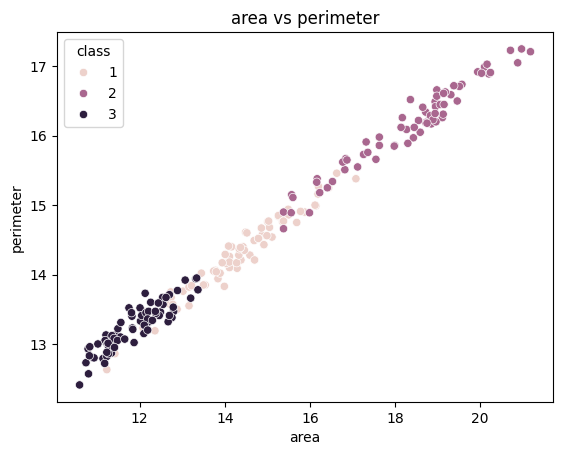

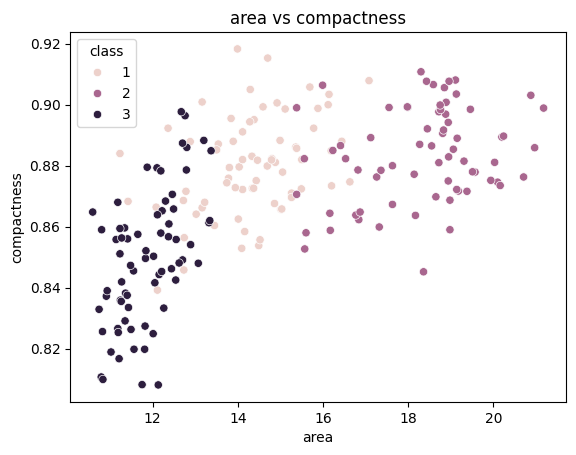

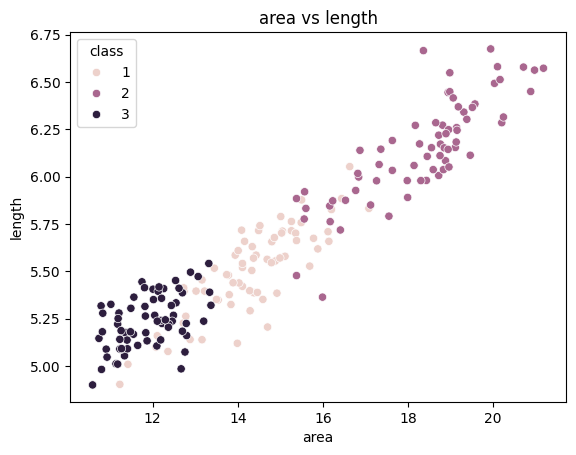

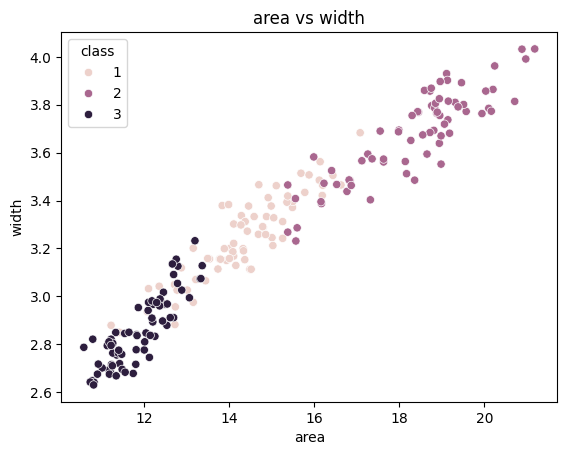

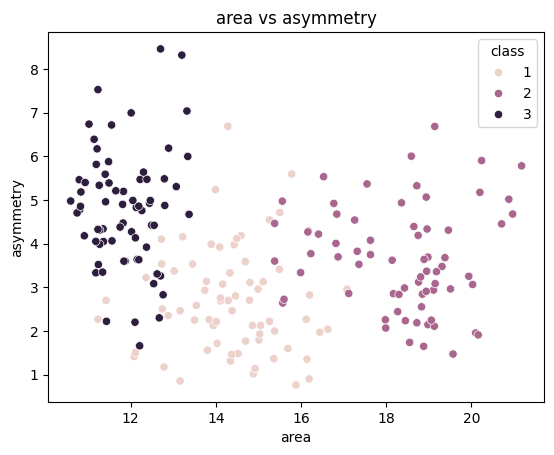

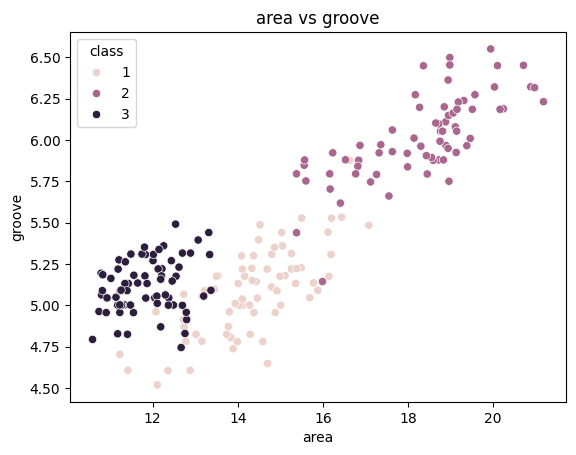

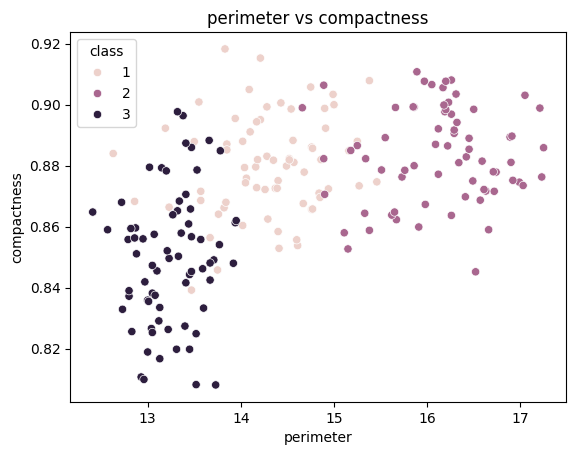

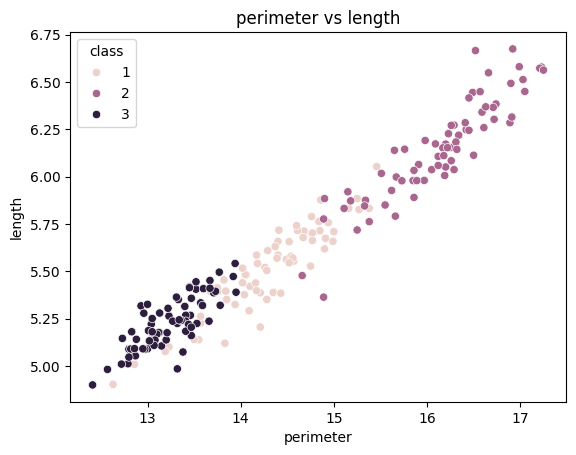

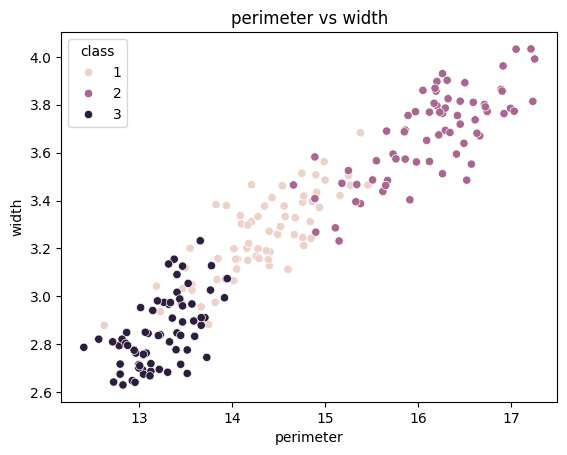

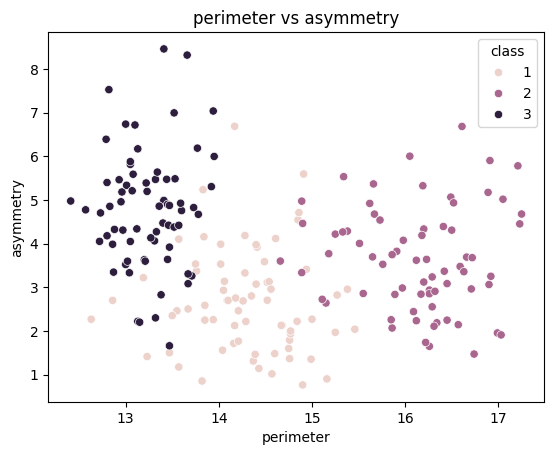

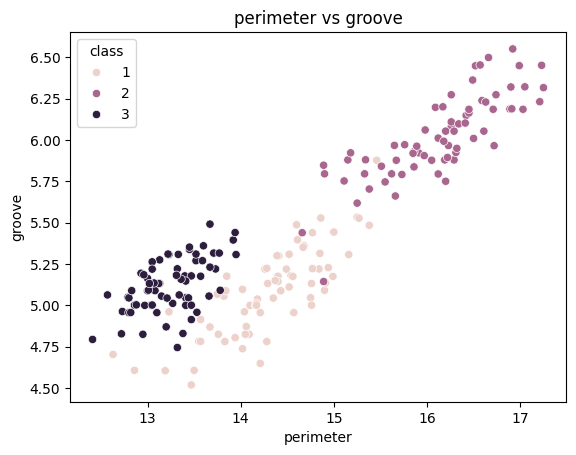

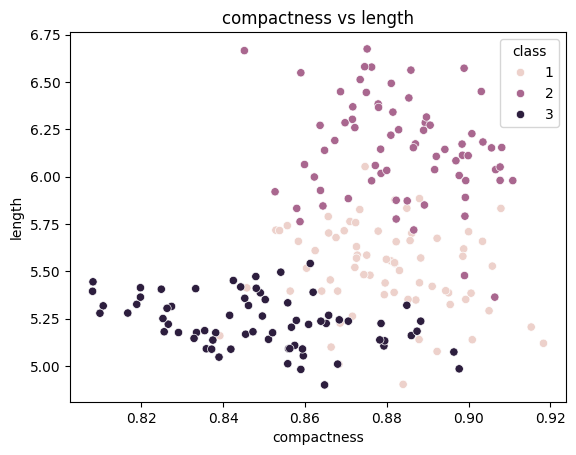

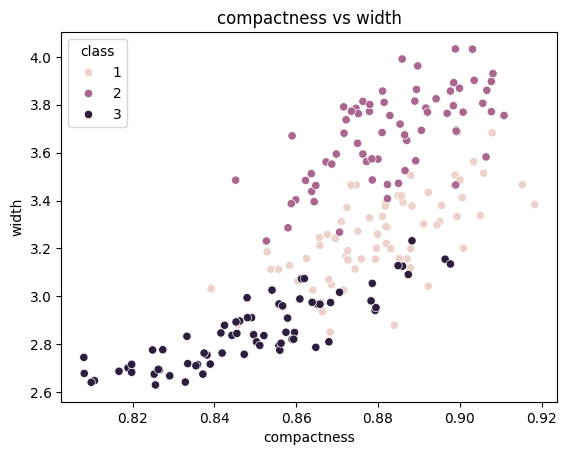

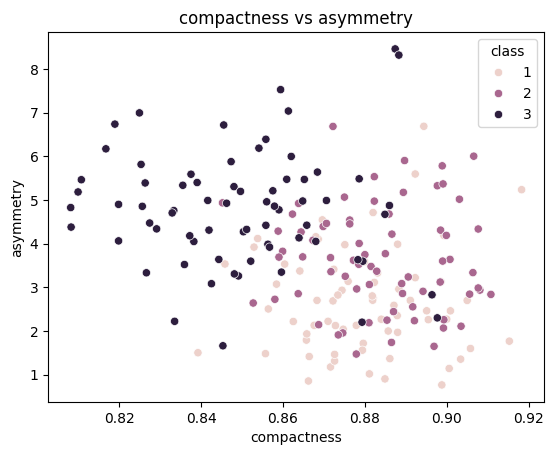

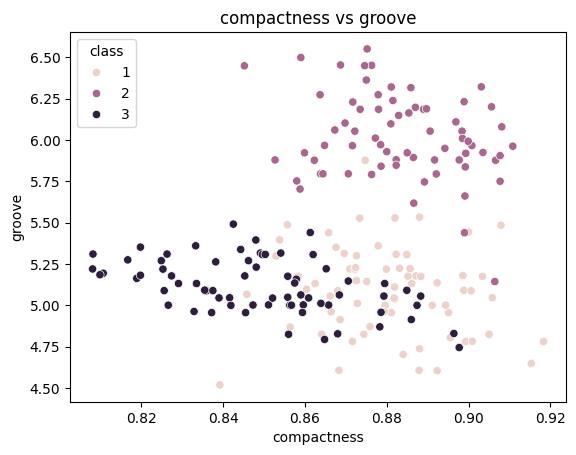

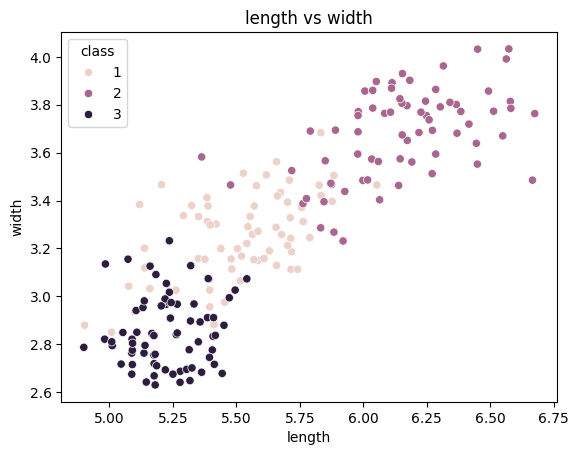

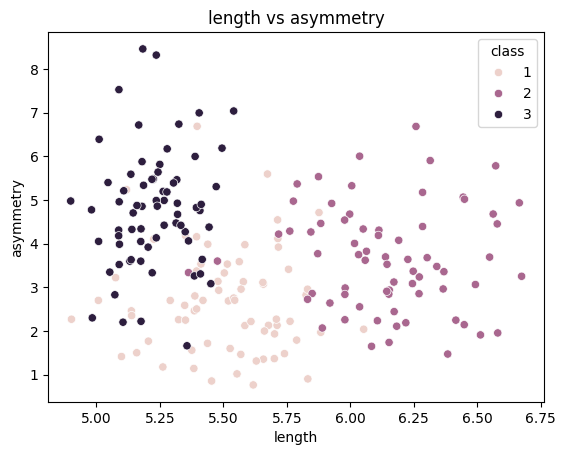

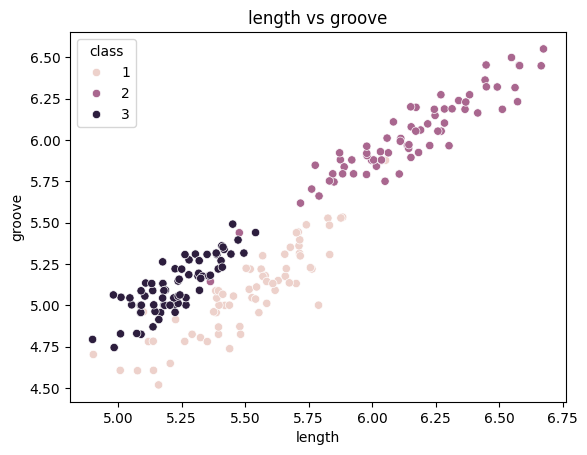

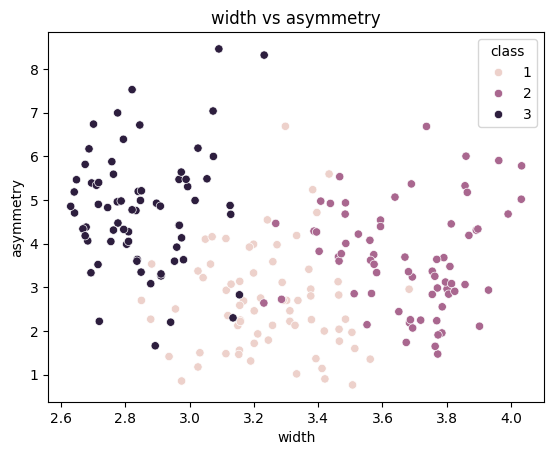

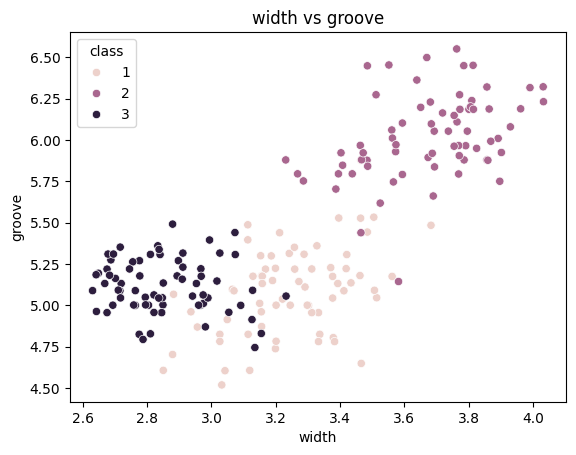

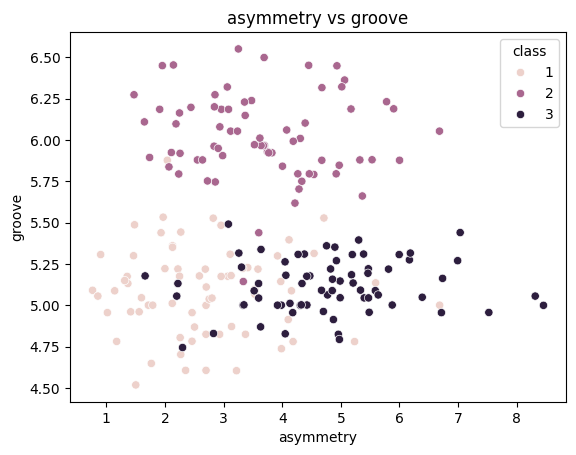

In [6]:
for i in range (len(cols)-1):
  for j in range (i+1,len(cols)-1):
    x_label=cols[i]
    y_label=cols[j]
    sns.scatterplot(x=x_label,y=y_label,data=df,hue='class')
    plt.title(x_label+' vs '+y_label)
    plt.show()

#K-MEAN Clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
x = 'perimeter'
y = 'asymmetry'
X= df[[x,y]].values

In [9]:
kmeans = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
clusters = kmeans.labels_
print(clusters)

[1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 1 1 0 2 2 2 2 2 2 1 2
 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 1 2]


In [11]:
df["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [13]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))), columns=[x,y,'class'])

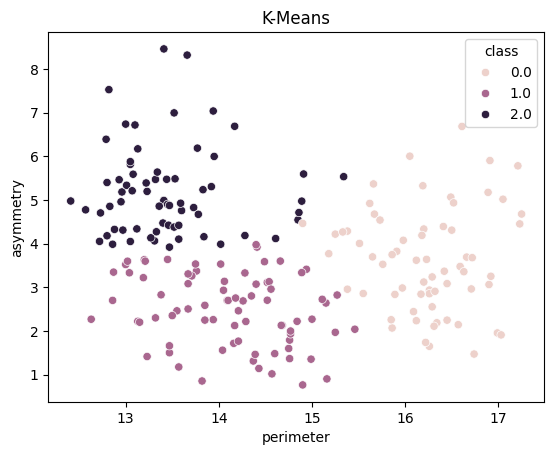

In [15]:
#k means classes
sns.scatterplot(x=x,y=y,data=cluster_df,hue='class')
plt.title('K-Means')
plt.show()

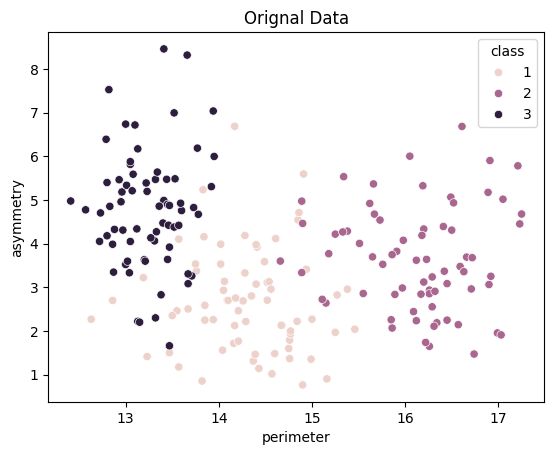

In [16]:
#orignal classes
sns.scatterplot(x=x,y=y,data=df,hue='class')
plt.title('Orignal Data')
plt.show()

**Higher Dimensions**

In [17]:
X=df[cols[:-1]].values

In [23]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


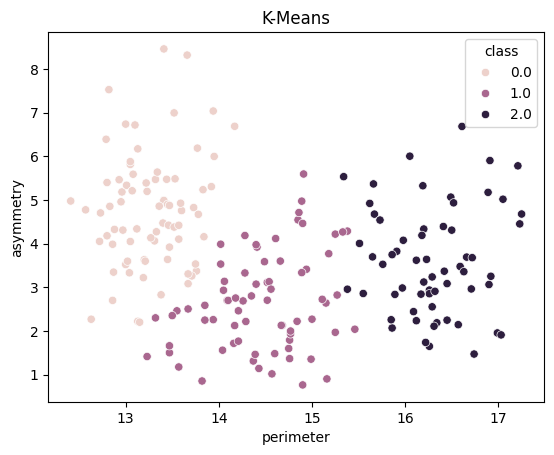

In [24]:
#k means classes
sns.scatterplot(x=x,y=y,data=cluster_df,hue='class')
plt.title('K-Means')
plt.show()

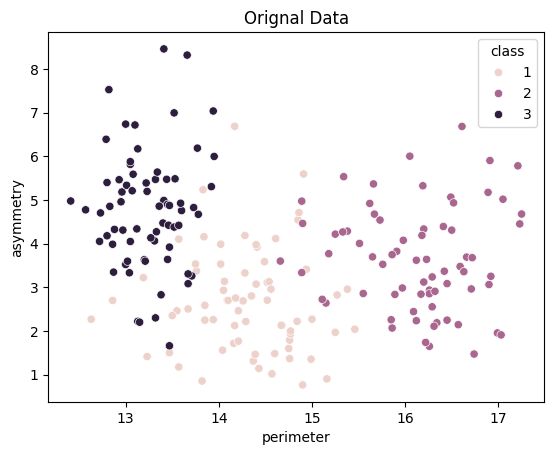

In [25]:
#orignal classes
sns.scatterplot(x=x,y=y,data=df,hue='class')
plt.title('Orignal Data')
plt.show()

#PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(X)

In [31]:
X.shape

(210, 7)

In [32]:
transformed.shape

(210, 2)

In [33]:
X[:5]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]])

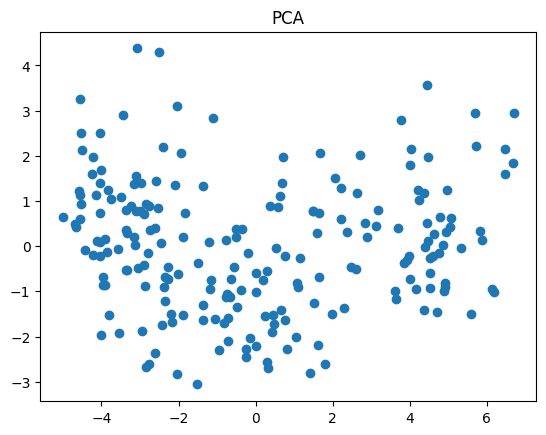

In [34]:
plt.scatter(transformed[:,0],transformed[:,1])
plt.title('PCA')
plt.show()

In [35]:
kmeans_pca_df= pd.DataFrame(np.hstack((transformed, kmeans.labels_.reshape(-1, 1))), columns=['PCA1','PCA2','class'])

In [36]:
orignal_pca_df= pd.DataFrame(np.hstack((transformed, df['class'].values.reshape(-1, 1))), columns=['PCA1','PCA2','class'])

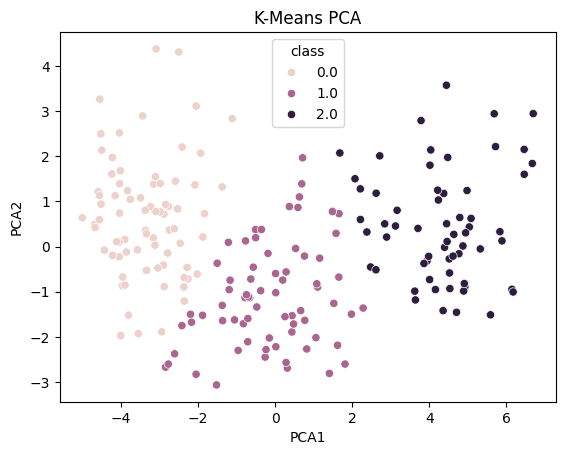

In [38]:
#k means classes
sns.scatterplot(x="PCA1",y="PCA2",data=kmeans_pca_df,hue='class')
plt.title('K-Means PCA')
plt.show()

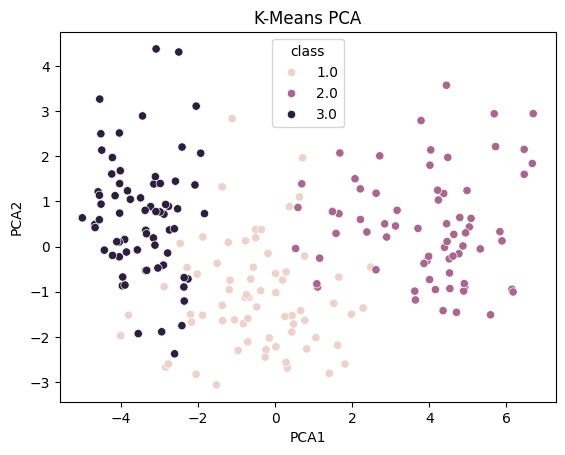

In [39]:
#Orignal PCA classes
sns.scatterplot(x="PCA1",y="PCA2",data=orignal_pca_df,hue='class')
plt.title('K-Means PCA')
plt.show()